# **Decision Trees For Individual Factors**





=== Decision Tree for: family_ob_hist ===
Accuracy: 0.7481
Confusion Matrix:
[[104 130]
 [  3 291]]


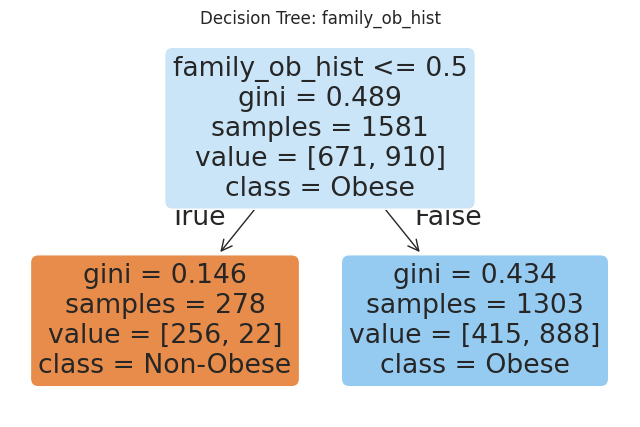


=== Decision Tree for: freq_high_cal_food ===
Accuracy: 0.6231
Confusion Matrix:
[[ 50 184]
 [ 15 279]]


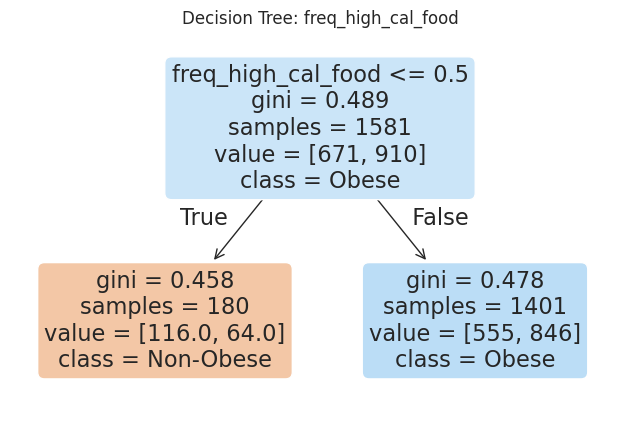


=== Decision Tree for: phy_act_freq ===
Accuracy: 0.7045
Confusion Matrix:
[[116 118]
 [ 38 256]]


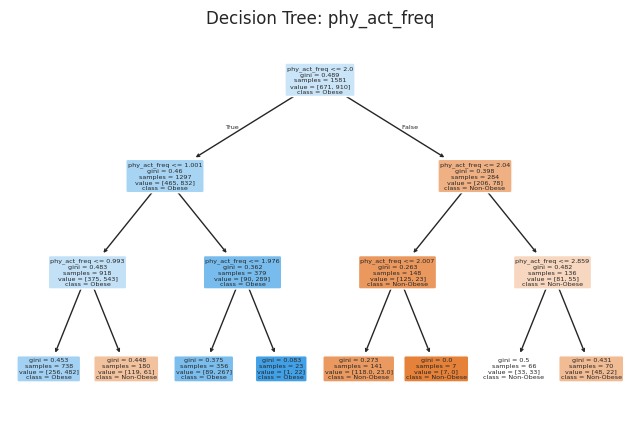


=== Decision Tree for: consumption_of_alcohol ===
Accuracy: 0.5511
Confusion Matrix:
[[  8 226]
 [ 11 283]]


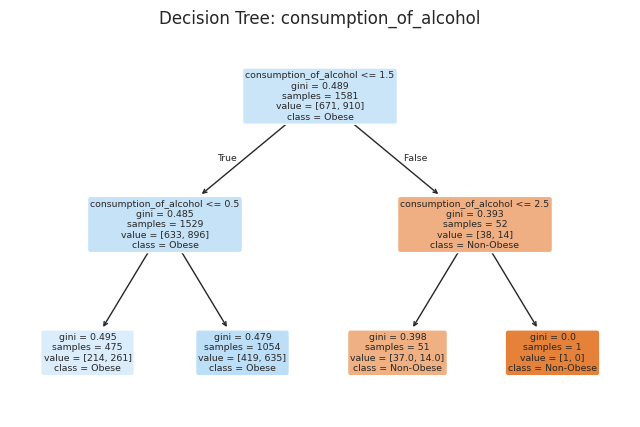

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Set random seed and define target/predictors
random_seed = 11
y = pd.DataFrame(df_cleaned['Obesity'])
predictor_columns = ["family_ob_hist", "freq_high_cal_food", "phy_act_freq", "consumption_of_alcohol"]

# Loop through each predictor
for predictor in predictor_columns:
    print(f"\n=== Decision Tree for: {predictor} ===")

    # Single predictor dataframe
    X = pd.DataFrame(df_cleaned[[predictor]])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

    # Train decision tree
    dectree = DecisionTreeClassifier(max_depth=3)
    dectree.fit(X_train, y_train)

    # Predict
    y_test_pred = dectree.predict(X_test)

    # Accuracy and Confusion Matrix
    acc = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)

    # Display results
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot tree
    plt.figure(figsize=(8, 5))
    plot_tree(dectree, filled=True, rounded=True,
              feature_names=[predictor],
              class_names=["Non-Obese", "Obese"])
    plt.title(f"Decision Tree: {predictor}")
    plt.show()


| **Dataset**                     | **Root Node Condition**          | **True Branch**                                                      | **False Branch**                                                     | **Accuracy** | **Confusion Matrix**         |
|----------------------------------|----------------------------------|----------------------------------------------------------------------|---------------------------------------------------------------------|--------------|-------------------------------|
| **family_ob_hist**              | family_ob_hist ≤ 0.5            | Gini: 0.489<br>Samples: 1581<br>Class: [671, 910]<br>Predicted: Obese  | Gini: 0.434<br>Samples: 1283<br>Class: [415, 868]<br>Predicted: Obese  | 74.81%       | [[1104, 130],<br>[281, 369]] |
| **freq_high_cal_food**         | freq_high_cal_food ≤ 0.5        | Gini: 0.458<br>Samples: 180<br>Class: [116, 64]<br>Predicted: Non-Obese | Gini: 0.478<br>Samples: 1401<br>Class: [555, 846]<br>Predicted: Obese  | 62.31%       | [[58, 104],<br>[5, 279]]     |
| **phy_act_freq**                | phy_act_freq ≤ 0.5              | Gini: 0.420<br>Samples: 1181<br>Class: [1018, 163]<br>Predicted: Active | Gini: 0.484<br>Samples: 256<br>Class: [38, 218]<br>Predicted: Inactive | 70.45%       | [[110, 118],<br>[38, 256]]   |
| **consumption_of_alcohol**      | consumption_of_alcohol ≤ 0.5     | Gini: 0.479<br>Samples: 283<br>Class: [116, 167]<br>Predicted: Non-Drinker | Gini: 0.440<br>Samples: 492<br>Class: [156, 336]<br>Predicted: Drinker | 51.51%       | [[116, 167],<br>[0, 283]]    |

## Conclusion of Individual Factors

1. The **highest accuracy** is observed in the *family_ob_hist* dataset, achieving **74.81%**, which suggests that the features within this dataset are **effective** at predicting obesity.

2. In contrast, the *consumption_of_alcohol* dataset shows the **lowest accuracy** at **51.51%**, indicating a less reliable classification, potentially due to overlapping characteristics between drinkers and non-drinkers.

3. The Gini impurity values reveal similar patterns, with the *family_ob_hist tree* demonstrating the **lowest impurity in its true branch**, leading to a clearer distinction between classes.

4. Additionally, the *phy_act_freq* dataset shows a moderate accuracy of 70.45%, indicating a reasonably effective model for predicting physical activity levels.

Overall, the *freq_high_cal_food* and *consumption_of_alcohol* datasets present challenges in classification, suggesting a need for further feature engineering or more comprehensive data to improve predictive performance. Hence, below is our analysis of the factors altogether.



# **Model 1 - Binary Decision Tree Classification**

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


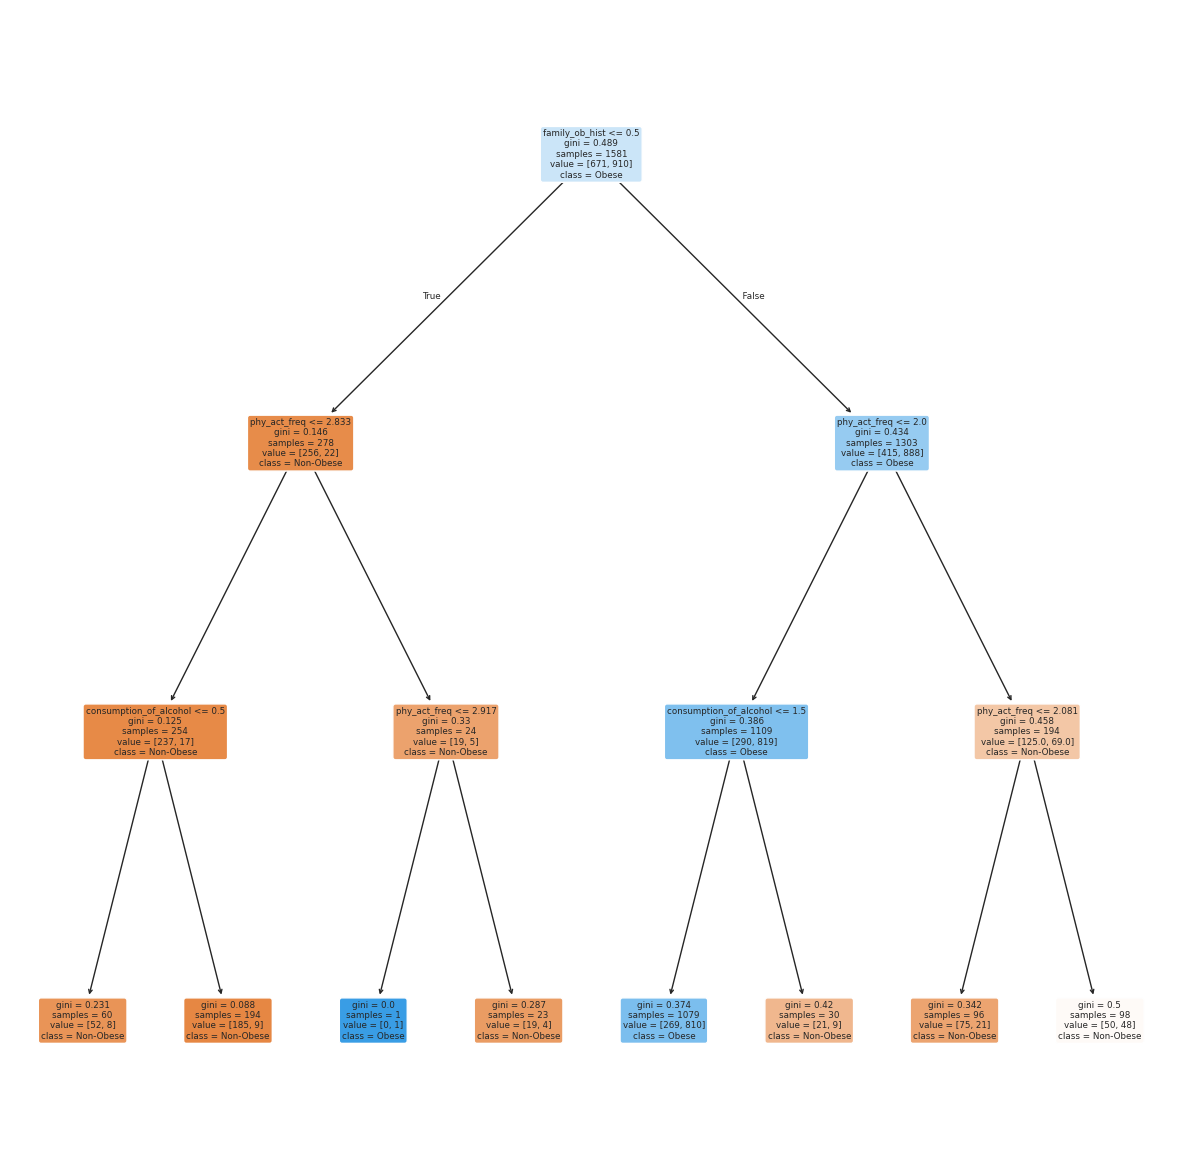

In [ ]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=list(X_train.columns),  # Convert Index to list
          class_names=["Non-Obese", "Obese"])

plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.767235926628716

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7916666666666666



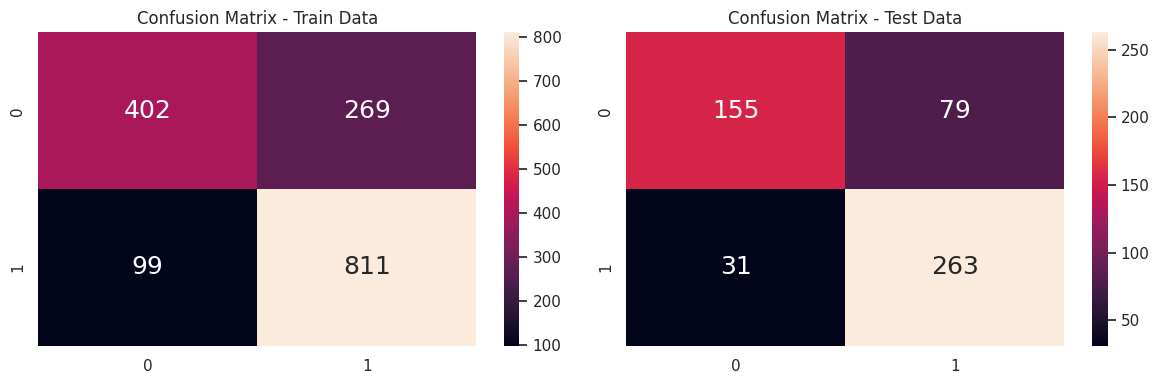

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Data')
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Data')
plt.tight_layout()

**Key Metrics:**

False Positive Rate (FPR)
FPR = FP/FP+TN

FPR represents the proportion of negative instances incorrectly classified as positive.

True Positive Rate (TPR) / Recall
TPR = TP/TP+FN

TPR represents the proportion of positive instances correctly classified.


**Train Dataset Calculation:**
True Positives (TP) = 811

False Positives (FP) = 269

True Negatives (TN) = 402

False Negatives (FN) = 99

FPR(train) = 269/(269+402) = 0.400

TNR (train) = 402/(269+402) = 0.599

TPR(train) = 811/(811+99) = 0.891

FNR (train) = 99/(99+811) = 0.109

**Test Dataset Calculation:**
True Positives (TP) = 263

False Positives (FP) = 79

True Negatives (TN) = 155

False Negatives (FN) = 31

FPR(test) = 79/(79+155) = 0.338

TNR(test) = 155/(79+155) = 0.66

TPR(test) = 263/(263+31) = 0.895

FNR(test) = 31/(263+31) = 0.105

**Analysis**

The model achieves a *high True Positive Rate (89%)*, meaning it correctly identifies most cases of obesity. However, it also has a *relatively high False Positive Rate (33, 40%)*, meaning some non-obese individuals are classified as obese.

**Why the High False Positive Rate is Acceptable**


1. ✅ False Negatives (FNs) Are More Harmful
- A False Negative (FN) means failing to identify someone who is actually obese. This is much riskier than the other wrong classifications because:

  - It delays lifestyle interventions, increasing the risk of obesity-related diseases (diabetes, heart issues).

  - The individual might continue unhealthy habits, missing an opportunity for early action.

Since our model has a high recall (TPR 89%), it effectively minimizes False Negatives, ensuring that most obese individuals are correctly identified. The trade-off is a higher FPR, which is acceptable in this case.

2. ✅ Model Balance: Prioritizing Sensitivity Over Specificity
- The model favors detecting obesity cases (high recall) over absolute precision.
Lowering FPR further could reduce TPR, leading to more missed obesity cases, which is undesirable.

- Given that obesity screening should prioritise identifying all potential obesity cases (even at the risk of some false positives), this trade-off is justified.

3. ✅ Contextual Justification:
- The FPR Might Not Be as Bad as It Looks
Some False Positives might be borderline cases, meaning the model is not completely wrong but rather conservative in classification.

- If obesity rates in the population are high, the impact of false positives is further reduced.

***Conclusion 🎯***

- The model achieves a good balance between identifying obesity cases (TPR ~90%) and limiting misclassifications.

- False Negatives are far riskier than False Positives, and the model successfully minimizes them.

- Given the context of obesity detection, this model is well-tuned for practical use, prioritizing recall where needed.

- Thus, the False Positive Rate is an acceptable trade-off for ensuring that most obesity cases are detected, making this model suitable for application.




## **Detailed Observations on the Decision Tree Model**

### 1. Root Node (Most Important Feature)

- The root node splits on "family_ob_hist" ≤ 0.5.

- Samples: 1581, with a class distribution of (671 Non-Obese, 910 Obese).

- Gini impurity = 0.489, indicating moderate class mixing.

- This shows that **family history of obesity is the most influential factor** in classification.

### 2. Key Decision Factors and Splits

- If family_ob_hist ≤ 0.5, the next split is based on "phy_act_freq" ≤ 2.833:

 - Low Gini of 0.146, meaning there is strong confidence in this classification where most individuals in this group are classified as Non-Obese.

- If family_ob_hist > 0.5, the next split happens on "phy_act_freq" ≤ 2.0:

 - Moderate Gini of 0.434, meaning there is moderate class mixing, suggesting that while there is quite significant level of uncertainty in this classification. The classification is less confident than in the left subtree.However, the class here is Obese.

### 3. Physical Activity Frequency (phy_act_freq) is Critical

- After "family_ob_hist," the tree immediately splits on "phy_act_freq" in both major branches, showing its strong influence.

- "phy_act_freq" leads to highly confident classifications as seen in the low Gini values in most of it's branches.

- Individuals with lower physical activity tend to be classified as Obese and the reverse is true for Non-Obese.


### 4. Final Leaf Nodes (Classifications)

- The model reaches high purity at the leaf nodes, meaning the **classifications are quite confident**:

a. **Node with 1,079 Samples** (Gini = 0.374, Class= Obese):

This node indicates a strong tendency toward classifying individuals as Obese, with moderate certainty. The lower Gini value reflects reduced class mixing.

b.**Node with 233 Samples** (Gini = 0.288, Class = Non-Obese):

High confidence in classifying these individuals as Non-Obese due to low Gini impurity, indicating minimal class overlap and strong classification.

c.**Node with 194 Samples** (Gini = 0.088, Class = Non-Obese):

Very high purity, almost all individuals are confidently classified as Non-Obese. The exceptionally low Gini value signals clear separation between classes.

d. **Smaller Node with 98 Samples** (Gini = 0.5):

Interpretation: Represents the highest uncertainty in the tree. A Gini of 0.5 means maximum class mixing, indicating no clear majority between Obese and Non-Obese.

### 5. Gini Impurity Trends & Interpretability

- The tree starts with a Gini impurity of 0.489 at the root, meaning the initial class distribution has significant uncertainty.

- As the tree splits deeper:

  - **Gini values decrease significantly (as low as 0.125 in some branches), showing that classification becomes more confident**.

  - The tree has a maximum depth of 3, which balances interpretability and accuracy.

  - **The tree does not appear overfit, as it generalizes well using only a few key features.**

# **Conclusion**

- Family history of obesity is the most important factor in classification.

- Physical activity frequency plays a crucial role in predicting obesity risk, especially for those with a family history.

- Alcohol consumption is a secondary factor, mostly affecting classification for individuals without a family history.

- Frequent consumption of high caloric food is the least important factor in predicting obesity risk, since it does not appear as a splitting feature.

The model achieves a good balance between accuracy and interpretability, with high purity at most leaf nodes ensuring confident classifications.